# General results

The first part of the surveys were completed between June and September 2020 and focused on the urban Suze river and its Madretschkanal variant in Biel/Bienne. The second set of surveys were conducted between February 2021 and September 2021 and included a wider geographical scope around the municipality of Biel/Bienne. The objective was to construct an initial dataset on the remnant flowering plant populations growing in different green spaces around the city of Biel/Bienne and develop some standard reporting to make the data actionable for scientific and management purposes.

This chapter contains some overall summaries and a brief look into the invasive, redlist and priority species identified.

In [62]:
# Final survey notebook for 2020-2021 plant surveys


# Import packages and files

# math and data packages
import pandas as pd
import numpy as np
import math
from scipy import ndimage

# charting and graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg

# os and file types
import os
import sys
import datetime as dt
import json
import csv

# images and display
import base64, io, IPython
from PIL import Image as PILImage
from IPython.display import Markdown as md
from IPython.display import display

# import survey data and initialize datetime
spd=pd.read_csv("resources/survey_data_lists_02_22.csv")
spd["date"] = pd.to_datetime(spd['date'], errors='coerce', format='%Y-%m-%d')
spd["month"] = spd["date"].dt.month

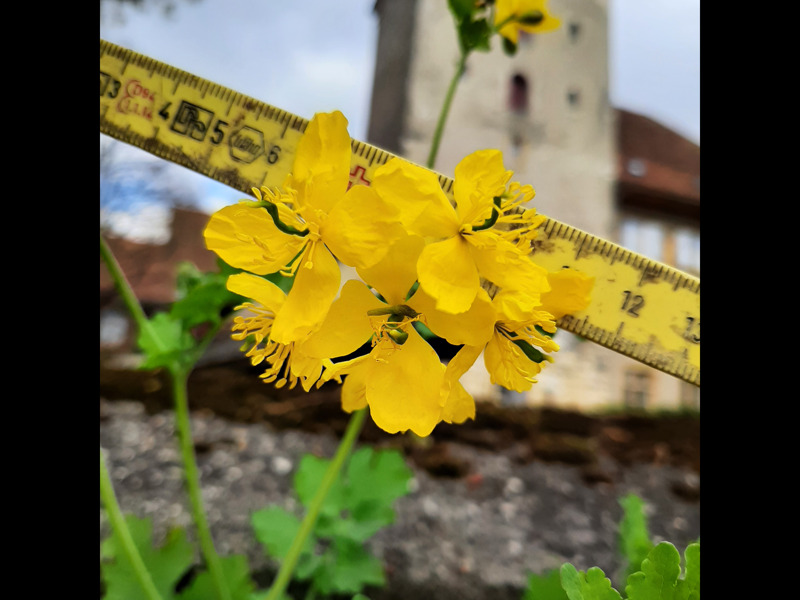

In [63]:
# generate banner image

this_picture = PILImage.open("resources/pictures/20210403_123904.jpg")
this_picture_r = this_picture.rotate(270)
output = io.BytesIO()
this_picture_r.thumbnail((800, 1200))

this_picture_r.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
md(html)

## Survey locations

In the first year, the focus was primarily on the urban Suze river and its Madretschkanal variant. Along this stretch of the river, as with many urban settings, there are many varied habitats, from deep shade to full pavement to flower strips maintained for ecological and aesthetic purposes. The sites are managed by the municipality to a greater or less degree and all areas surveyed were open access to the public and reasonably accessible for an average person. In 2021 the surveys included a wider geographic scope, but still largely remained in Biel and its environs. The zones surveyed ranged from railroad berms to green areas in the sidewalk in an effort to capture the diversity of herbaceous plants around the city.

The sites varied greatly in size and shape. The size of the sites was not recorded, but a detailed description of is available. In nearly all cases it is possible to recover the boundary of the sites based on the geometry of the object. For example, surveys were usually bounded by sidewalks, roads, or other barriers.

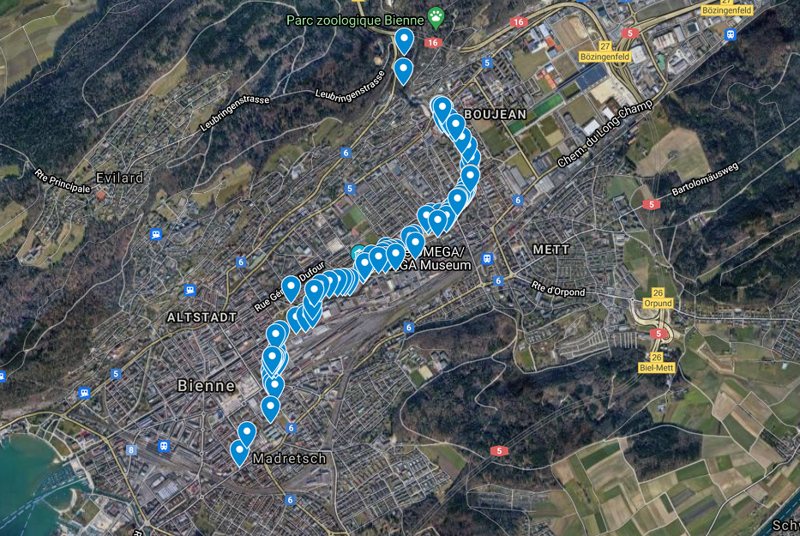

In [64]:
# generate mymaps image of year 1 survey sites in Biel/Bienne

this_picture = PILImage.open("resources/pictures/MyMaps.png")
output = io.BytesIO()
this_picture.thumbnail((800, 1200))

this_picture.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
md(html)

Text(0, 0, 'Cygnes Lot')

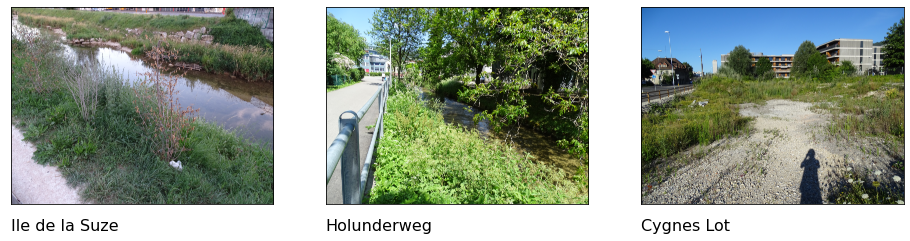

In [65]:
# generate images of survey sites

# read images
img_A = mpimg.imread('resources/pictures/DSC04657.JPG')
img_B = mpimg.imread('resources/pictures/suze-2.JPG')
img_C = mpimg.imread('resources/pictures/DSC02009.JPG')

# display the images
fig, ax = plt.subplots(1,3, figsize = (16,10))
ax[0].imshow(img_A);
ax[1].imshow(img_B);
ax[2].imshow(img_C)

# format axes to include label and remove unnecessary formatting
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[0].set_xlabel("Ile de la Suze", fontsize=16, loc='left', labelpad=15)
ax[1].set_xlabel("Holunderweg", fontsize=16, loc='left', labelpad=15)
ax[2].set_xlabel("Cygnes Lot", fontsize=16, loc='left', labelpad=15)

## Summary results

Over the course of the two years 480 unique species were identified, the majority in the second year. Initially in June 2020, the number of plants that could be reliably identified by the surveyor was relatively small, where as by June 2021, the surveyor could reliably identify the common species that dominate the landscape. In year one, most observations (40%) were recorded in August, while in year 2 most observations were recorded in July, but that was only 20% of the total for that year. Some other changes between year one and year two to consider are the following:
* Surveys were conducted from February - September in year 2 and only from June to September in year 1
* Around 5 times as many plants were identified in year 2 as in year 1
* The surveyor adopted the use of identification to the genus level in the second year for difficult to identify species
* Initially only plants *in flower* were identified. While this remained largely the case, some plants (e.g. *Hedera helix*) were widespread and could be identified with or without flowers.
* Some trees were included in the observations later in the second year.

The following figures summarize the year 1 and year 2 surveys.

*__Below left:__ The number of species, samples and locations sampled per month. __Top right:__ The number of unique species identified per sample. __Bottom right:__ The aggregated values for each year.*

In [66]:
# functions for making tables, graphs and charts of the survey results

def make_a_summary_table(ax, data,colLabels, a_color="black", font_size=12, s_et_bottom_row=True):
    
    """Formats matplotlib table object.

    Args:
    ax: object: matplotlib table object
    data: array: the 2d array used to generate the table object
    cols_to_use: array: the list of column names
    a_color: str: matplotlib named color, face and edgecolor of table cells
    font_size: int: the font size for the table cells
    s_et_bottom_row: bool: whether or not to draw bottom line on the last row

    Returns:
    The table object formatted.
    """

    ax.auto_set_font_size(False)
    the_cells = ax.get_celld()

    line_color = colors.to_rgba(a_color)
    banded_color = (*line_color[:-1], 0.1)

    # the different areas of formatting
    top_row = [(0, i) for i in np.arange(len(colLabels))]
    bottom_row = [(len(data), i) for i in np.arange(len(colLabels))]
    data_rows = [x for x in list(the_cells.keys()) if x not in top_row]
        
    for a_cell in top_row:
        ax[a_cell].visible_edges = "B"
        ax[a_cell].set_text_props(**{"fontsize": font_size})
        ax[a_cell].set_edgecolor("black")
        ax[a_cell].PAD = .2
        ax[a_cell].set_linewidth = 1
        ax[a_cell].set_height(.5 / (len(data)))

    for a_cell in data_rows:
        ax[a_cell].set_height(.5 / (len(data)))
        ax[a_cell].visible_edges = "BT"
        ax[a_cell].set_text_props(**{"fontsize": font_size})
        ax[a_cell].set_edgecolor(banded_color)
        ax[a_cell]._text.set_horizontalalignment("center")
        ax[a_cell].set_linewidth = .1

    if s_et_bottom_row is True:
        
        for a_cell in bottom_row:
            ax[a_cell].visible_edges = "B"
            ax[a_cell].set_edgecolor(line_color)
            ax[a_cell].set_linewidth = 1

    return ax



def a_simple_formatted_table(ax,data,colLabels=[], a_color="black", colWidths=[], bbox=[], **kwargs):
    """Makes a table with rows from a matplotlib axes object and a 2d array. Header row is
    spererated from table body by a thicker black line. 
    
    :param ax: An axes
    :type ax: matplotlib axes
    :param data: An array of the table values not including column names or labels
    :type data: array
    :param colLabels: The labels for the data table columns
    :type colLabels: array
    :param a_color: The color of the cell borders
    :type a_color: str
    :param colWidths: The width of each column in fractions of 1
    :type colWdiths: array, x < 1
    :param bbox: The location of the table in figure space
    :type bbox: array
    :return: A table on the provided axis
    :rtype: matplotlib.axes
    
    """
    a = ax.table(data,  colLabels=colLabels, colWidths=colWidths, bbox=bbox, loc="lower center", **kwargs)
    t = make_a_summary_table(a, data, colLabels, a_color=a_color, font_size=12, s_et_bottom_row=False)
    return t


def a_stacked_bar_chart(ax, bars, xaxis=[], totals={}, **kwargs):
    """Makes a stacked barchart given a matplotlib < ax > object
    and a dictionary of values for each "row" of the stack.
    
    :param ax: A matplotlib axes object
    :type ax: matplotlib.axes
    :param bars: Dictionary of values for each row
    :type bars: dict
    :param xaxis: The values that define the xaxis, can be
         date or categorical
    :type xaxis: array
    :param totals: A dictionary for a second non stacked bar chart.
    :type totals: dict
    :Return: A matplotlib axes object with a stacked barchart.    
    """
    # set the bottom of the stacked bar chart
    bottom = 0
    
    if totals:
        # this is a seperate independent stack
        # its value does not effect the value of <bottom>
        ax.bar(xaxis, totals["data"], bottom=bottom, label=totals["label"], zorder=0)
    else:
        pass
    
    for a_bar in bars:
        ax.bar(xaxis, bars[a_bar]["data"], bottom=bottom, label=a_bar, zorder=2)
        
        # add the value of data to bottom
        bottom += bars[a_bar]["data"]
    
    return ax

def a_single_column_table(ax,data, fs=12, colWidths=[.7, .3], bbox=[0,0,1,1], kwargs={}):
    """Makes a table with rows from a matplotlib axes object and a 2d array. Header row is
    spererated from table body by a thicker black line. 
    
    :param ax: An axes
    :type ax: matplotlib axes
    :param data: An array of the table values not including column names or labels
    :type data: array
    :param fs: The font size for the cell data
    :type fs: float, int
    :param colWidths: The width of each column in fractions of 1
    :type colWdiths: array, x < 1
    :param bbox: The location of the table in figure space
    :type bbox: array
    :return: A table on the provided axis
    :rtype: matplotlib.axes
    
    """
    
    
    a = ax.table(data, colWidths=colWidths, bbox=bbox, loc="lower center", **kwargs)
    a.auto_set_font_size(False)
    a.set_fontsize(fs)

    return a

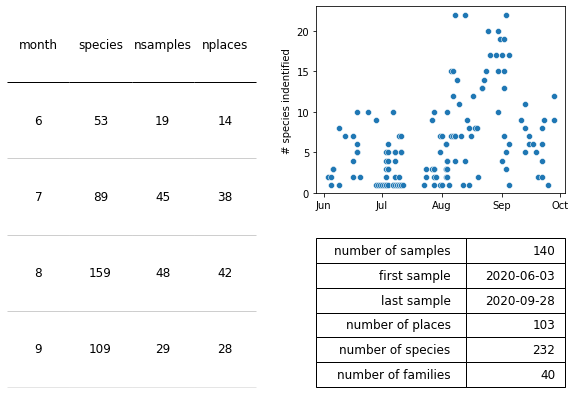

In [67]:
# Generate year 1 summary

# grab year 1 values

spd1 = spd.loc[spd["year"] == 1].copy()

# remove observations identified only to the genus level

spd1 = spd1[spd1['species'].str.contains('-')]

# axone monthly summary values
t_one = spd1.groupby(["month"], as_index=False).agg({"species":"nunique", "loc_date":"nunique", "locname":"nunique"})

data = t_one.values
colLabels = [*t_one.columns[:-2], "nsamples", "nplaces"]
colWidths = [*[1/len(colLabels)]*len(colLabels)]
bbox = [0, 0,1,1]

# axtwo species identified per sample
d = spd1.groupby(["date", "locname"], as_index=False).species.count()

# axthree summary values
summary={
    "number of samples":spd1.loc_date.nunique(),
    "first sample": spd1["date"].min().date(),
    "last sample":spd1["date"].max().date(),
    "number of places":spd1.locname.nunique(),
    "number of species":spd1.species.nunique(),
    "number of families":spd1.fam.nunique(),    

}

a_summary = pd.DataFrame.from_dict(summary, orient="index").reset_index()

# set up figure displays

fig = plt.figure(figsize=(10,7))

gs = GridSpec(10,11)

axone = fig.add_subplot(gs[:, 0:5])
axtwo = fig.add_subplot(gs[0:5, 6:])
axthree = fig.add_subplot(gs[6:, 6:])

# axone
table_one = a_simple_formatted_table(axone,data,colLabels=colLabels, colWidths=colWidths, bbox=bbox)
axone.axis("off")

# axtwo
locator = mdates.MonthLocator()  # every month
fmt = mdates.DateFormatter('%b')
sns.scatterplot(data=d, x="date", y="species", ax=axtwo)
axtwo.xaxis.set_major_locator(locator)
axtwo.xaxis.set_major_formatter(fmt)
axtwo.set_ylabel("# species indentified")
axtwo.set_xlabel("")

# axthree
b = a_single_column_table(axthree, a_summary.values, colWidths=[.6, .4])
axthree.axis("off")

plt.show()

[0.25, 0.25, 0.25, 0.25]


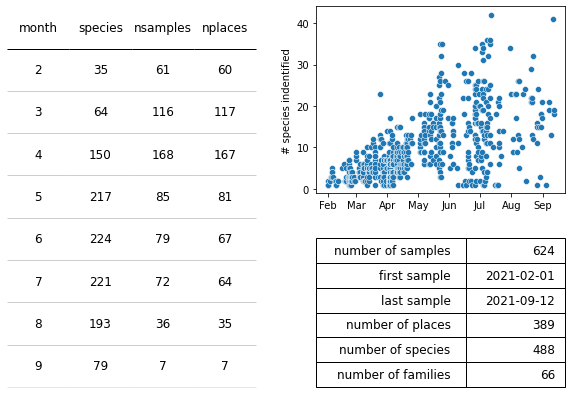

In [68]:
# grab all observations in year 2
spd2 = spd.loc[spd["year"] == 2].copy()

spd2 = spd2[spd2['species'].str.contains('-')]

# axone monthly summary values
t_one = spd2.groupby(["month"], as_index=False).agg({"species":"nunique", "loc_date":"nunique", "locname":"nunique"})

data = t_one.values
colLabels = [*t_one.columns[:-2], "nsamples", "nplaces"]
colWidths = [*[1/len(colLabels)]*len(colLabels)]
print(colWidths)
bbox = [0, 0,1,1]

# axtwo species identified per sample
d = spd2.groupby(["date", "locname"], as_index=False).species.count()

# axthree summary values
summary={
    "number of samples":spd2.loc_date.nunique(),
    "first sample": spd2["date"].min().date(),
    "last sample":spd2["date"].max().date(),
    "number of places":spd2.locname.nunique(),
    "number of species":spd2.species.nunique(),
    "number of families":spd2.fam.nunique(),    

}

a_summary = pd.DataFrame.from_dict(summary, orient="index").reset_index()


fig = plt.figure(figsize=(10,7))

gs = GridSpec(10,11)

axone = fig.add_subplot(gs[:, 0:5])
axtwo = fig.add_subplot(gs[0:5, 6:])
axthree = fig.add_subplot(gs[6:, 6:])

# axone
table_one = a_simple_formatted_table(axone,data,colLabels=colLabels, colWidths=colWidths, bbox=bbox)
axone.axis("off")

# axtwo
locator = mdates.MonthLocator()  # every month
fmt = mdates.DateFormatter('%b')
sns.scatterplot(data=d, x="date", y="species", ax=axtwo)
axtwo.xaxis.set_major_locator(locator)
axtwo.xaxis.set_major_formatter(fmt)
axtwo.set_ylabel("# species indentified")
axtwo.set_xlabel("")

# axthree
b = a_single_column_table(axthree, a_summary.values, colWidths=[.6, .4])
axthree.axis("off")

plt.show()

A number of both native and nonnative species were identified, with the vast majority being native, as can be seen from the following charts which decompose the species identified into native (rch & ns), non-native (ni), invasive (inv), and species identified only to the genus level (ongen). Despite a significant increase in the number of sites, the ratios remained relatively constant, aside from the growth of the "genus only" category in year 2.

At the same time, note that since this is only an identification study, these results do not indicate the relative biomass of native versus non-native species and many of the non-native species can dominate the location. Note as well that indigenous species can acquire the attributes of a nonnative invasive species if it comes to dominate many habitats and reduce the overall biodiversity of areas due to its success. This is a weakness of this study that can be corrected with more intensive data gathering.

In [69]:
# 
bar_data = spd.loc[spd["year"]==2].copy()
dates = index=spd2["month"].sort_values().unique()

these_lists = ["rch","ni", "inv", "ongen", "ns"]
resampkey = "M"
on="date"
by = "loc_date"

not_these = ["X", 0]


count_these = {}
for a_list in these_lists:
    count_these.update({a_list:[x for x in bar_data[a_list].unique() if x not in not_these]})
    
# resample monthly totals:
bars={}
for a_list in these_lists:
    # for each category create an index of all months
    # with a sample
    month_index = pd.DataFrame(index=spd2["month"].unique())
    month_index.index.name = "month"
    
    # sum the occurences by month for each category
    l_data = bar_data[bar_data[a_list].isin(count_these[a_list])].groupby(["month"], as_index=False)[a_list].count()
    b_data = l_data.groupby("month")[a_list].sum()
    
    for data in b_data.index:
        month_index.loc[data, a_list]=b_data.loc[data]
    month_index.fillna(0, inplace=True)
    month_index.sort_index(inplace=True)
    
    bars.update({a_list: {"data": month_index.values.flatten()}})

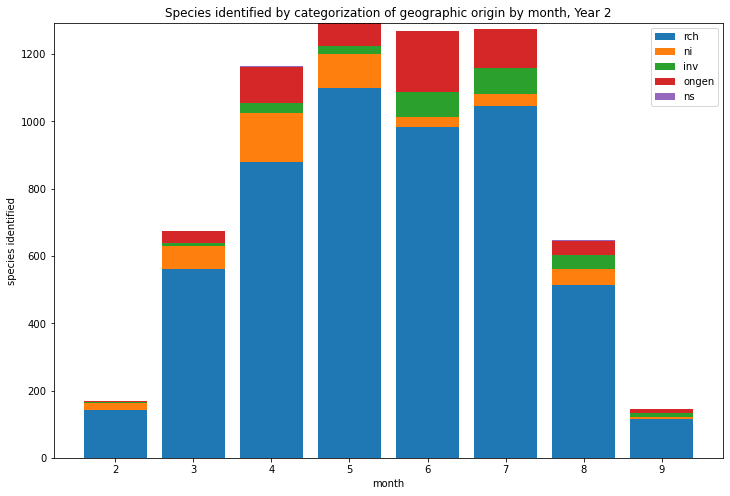

In [70]:
tick_spacing = 1

fig, ax = plt.subplots(figsize=(12, 8))
a_stacked_bar_chart(ax, bars, xaxis=dates)
plt.legend()


ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xlabel("month")
ax.set_ylabel("species identified")
plt.title("Species identified by categorization of geographic origin by month, Year 2")

plt.show()   

In [71]:
# the data from year one
bar_data = spd.loc[spd["year"] == 1].copy()

# the dates for the end of each month that has samples
dates = index=spd1["month"].sort_values().unique()

# count the number of occurences for each category at each survey
these_lists = ["rch","ni", "inv", "ongen", "ns"]
resampkey = "M"
on="date"
by = "loc_date"

# specify the values to count for each
# category - column
not_these = ["X", 0]

count_these = {}
for a_list in these_lists:
    count_these.update({a_list:[x for x in bar_data[a_list].unique() if x not in not_these]})
    
# resample monthly totals:
bars={}
for a_list in these_lists:
    # for each category create an index of all months
    # with a sample
    month_index = pd.DataFrame(index=spd1["month"].unique())
    month_index.index.name = "month"
    
    # sum the occurences by month for each category
    l_data = bar_data[bar_data[a_list].isin(count_these[a_list])].groupby(["month"], as_index=False)[a_list].count()
    b_data = l_data.groupby("month")[a_list].sum()
    
    for data in b_data.index:
        month_index.loc[data, a_list]=b_data.loc[data]
    month_index.fillna(0, inplace=True)
    month_index.sort_index(inplace=True)
    
    bars.update({a_list: {"data": month_index.values.flatten()}})

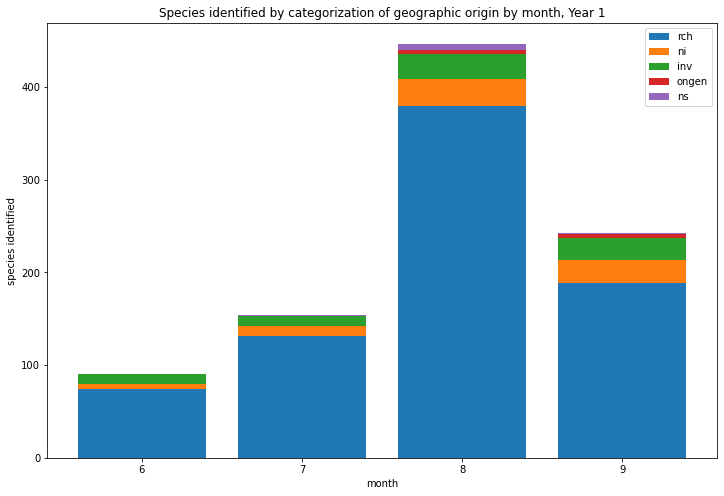

In [72]:
tick_spacing = 1

fig, ax = plt.subplots(figsize=(12, 8))
a_stacked_bar_chart(ax, bars, xaxis=dates)
plt.legend()


ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xlabel("month")
ax.set_ylabel("species identified")
plt.title("Species identified by categorization of geographic origin by month, Year 1")

plt.show()   

### Not indigenous, not invasive

A good example of a common non indigenous, non-invasive plant, classified as *ni* in the chart above,  the annual *Conyza canadensis* (*Erigeron canadensis*) from Canada that thrives in disturbed areas around the city. It wsa identified in 12 locations in August and September 2021, however these numbers underplay the relative amount of the plant as it can seriously take over many areas as the below image illustrates. While the plant generally cedes its dominance as time passed ans thus is not considered invasive, it can still dominate areas during the succession phase. 

Another example of this category is the *Eupatorium cannabinum*, common along the river ways, shown below. Again, not considered invasive as it does not outcomete much of the native flora and does not prevent succession by native species. Given the limited timescale of interactions between these species and native ecological systems, they are still likely providing much fewer resources to insecets and other taxa than native plants would be. While there are counter examples of this phenomenon, for example where non-native species provide a reservoir to threatened species, it is generally the case that nonnative species are less ecologically valuable.

In [ ]:
# generate image

this_picture = PILImage.open("resources/pictures/20210822_192453.jpg")
output = io.BytesIO()
this_picture.thumbnail((800, 1200))

this_picture.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
md(html)

Another example of this category is the *Eupatorium cannabinum*, common along the river ways, shown below. Again, not considered invasive as it does not outcomete much of the native flora and does not prevent succession by native species. Given the limited timescale of interactions between these species and native ecological systems, they are still likely providing much fewer resources to insecets and other taxa than native plants would be. While there are counter examples of this phenomenon, for example where non-native species provide a reservoir to threatened species, it is generally the case that nonnative species are less ecologically valuable.

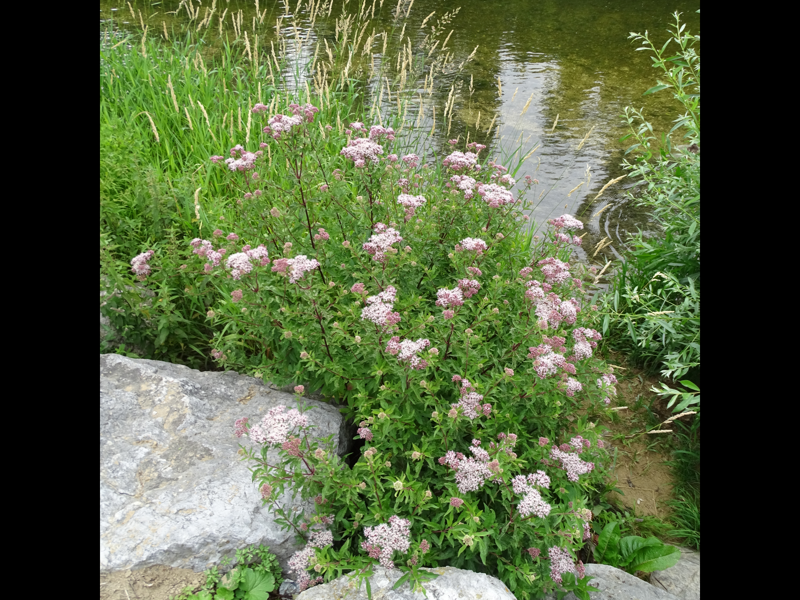

In [79]:
# generate image

this_picture = PILImage.open("resources/pictures/eupatorium-suze.JPG")
this_picture_r = this_picture.rotate(90)
output = io.BytesIO()
this_picture_r.thumbnail((800, 1200))

this_picture_r.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
md(html)

In [83]:
spdns = spd2[spd2["ns"] == "ns"]
spdns.head()

,Unnamed: 0,date,species,year,biogeo,canton,river,lot,forest,project,...,ode,ns,ongen,ni,cdf,biel,locname,loc_date,genus,month
1552,1553,2021-04-12,tulipa-aximensis,2,mp,be,X,X,X,X,...,X,ns,X,X,X,X,alfred-aebi-strasse-area-9,"('alfred-aebi-strasse-area-9', '2021-04-12')",tulipa,4
1590,1591,2021-04-12,tulipa-aximensis,2,mp,be,X,X,X,X,...,X,ns,X,X,X,X,keltenstrasse-berm-2,"('keltenstrasse-berm-2', '2021-04-12')",tulipa,4
1781,1782,2021-04-16,tulipa-raddii,2,mp,be,madretschkanal,X,X,X,...,X,ns,X,X,X,X,holunderweg-madretschkanal-5,"('holunderweg-madretschkanal-5', '2021-04-16')",tulipa,4
5784,5785,2021-08-08,atriplex-hortensis,2,mp,be,X,X,X,X,...,X,ns,X,X,X,X,alleestrasse-lot-1,"('alleestrasse-lot-1', '2021-08-08')",atriplex,8
6100,6101,2021-08-26,conopodium-majus,2,ju,be,X,X,X,X,...,X,ns,X,X,X,X,magglingen-forest-1,"('magglingen-forest-1', '2021-08-26')",conopodium,8


### Not native but special

These species arrived after the discovery of America (1500) Only 5 members of this category (ns) species, classified as "n" only made up .08% of the species observed. O

### Invasive species

A number of species on the watch list, black list and ODE list were identified. Some of them were planted, such as the *Mahonia aquifolium*, which is planted throughout the Madretsch quarter in Biel/Bienne. Others appeared to have moved into empty lots of their own accord such as *Solidago canadensis* and *Erigeron Annuus*.


The following table presents the blacklist (BL) and watchlist (WL) species identified in year 1 and year 2.

In [12]:
# generate data table of invasive species identified in year 2

# select all species classified as invasive according to the latest Infoflora watchlist
spdinv = spd.loc[spd['inv'] !="X"].copy()

# aggregate the data by status, year, and species.
spdinv1 = spdinv.groupby(["inv","year","species"]).agg({"species":"count","locname":"nunique",})
spdinv1

species  locname
inv year species                                   
BL  1    artemisia-verlotiorum           1        1
         buddleja-davidii                6        6
         erigeron-annuus                35       30
         impatiens-glandulifera          1        1
         reynoutria-japonica             1        1
         robinia-pseudoacacia            1        1
         rubus-armeniacus                1        1
         senecio-inaequidens            13       12
         solidago-canadensis            12       12
    2    buddleja-davidii               19       13
         erigeron-annuus               103       85
         heracleum-mantegazzianum        1        1
         prunus-laurocerasus             5        5
         prunus-serotina                 2        1
         reynoutria-japonica             1        1
         robinia-pseudoacacia           10       10
         senecio-inaequidens            27       20
         solidago-canadensis            45       37
         solidago-gigantea               1        1
WL  1    symphoricarpos-albus            1        1
    2    mahonia-aquifolium             47       39
         parthenocissus-inserta          2        2
         sedum-spurium                   3        3
         symphoricarpos-albus            1        1

*__Below left:__ The number of invasive species, and samples and locations that had invasive species per month. __Top right:__ The number of unique invasive species identified per sample. __Bottom right:__ The aggregated values for each year.*

[0.25, 0.25, 0.25, 0.25]


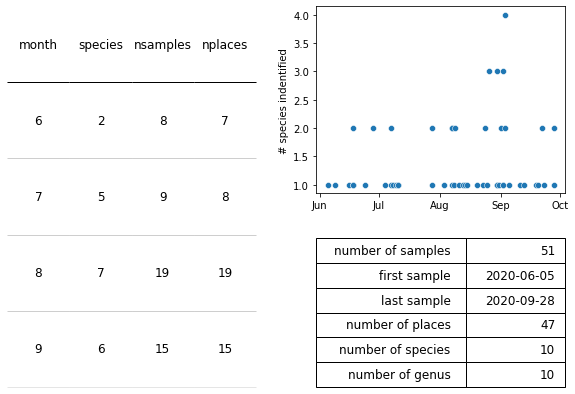

In [13]:
# summarizes invasive species data for year 1

# axone monthly summary values
spdinvy1 = spdinv.loc[spdinv["year"] == 1]

t_one = spdinvy1.groupby(["month"], as_index=False).agg({"species":"nunique", "loc_date":"nunique", "locname":"nunique"})

data = t_one.values
colLabels = [*t_one.columns[:-2], "nsamples", "nplaces"]
colWidths = [*[1/len(colLabels)]*len(colLabels)]
print(colWidths)
bbox = [0, 0,1,1]

# axtwo species identified per sample
d = spdinvy1.groupby(["date", "locname"], as_index=False).species.count()

# axthree summary values
summary={
    "number of samples":spdinvy1.loc_date.nunique(),
    "first sample": spdinvy1["date"].min().date(),
    "last sample":spdinvy1["date"].max().date(),
    "number of places":spdinvy1.locname.nunique(),
    "number of species":spdinvy1.species.nunique(),
    "number of genus":spdinvy1.genus.nunique(),    

}

a_summary = pd.DataFrame.from_dict(summary, orient="index").reset_index()


fig = plt.figure(figsize=(10,7))

gs = GridSpec(10,11)

axone = fig.add_subplot(gs[:, 0:5])
axtwo = fig.add_subplot(gs[0:5, 6:])
axthree = fig.add_subplot(gs[6:, 6:])

# axone
table_one = a_simple_formatted_table(axone,data,colLabels=colLabels, colWidths=colWidths, bbox=bbox)
axone.axis("off")

# axtwo
locator = mdates.MonthLocator()  # every month
fmt = mdates.DateFormatter('%b')
sns.scatterplot(data=d, x="date", y="species", ax=axtwo)
axtwo.xaxis.set_major_locator(locator)
axtwo.xaxis.set_major_formatter(fmt)
axtwo.set_ylabel("# species indentified")
axtwo.set_xlabel("")

# axthree
b = a_single_column_table(axthree, a_summary.values, colWidths=[.6, .4])
axthree.axis("off")

plt.show()

[0.25, 0.25, 0.25, 0.25]


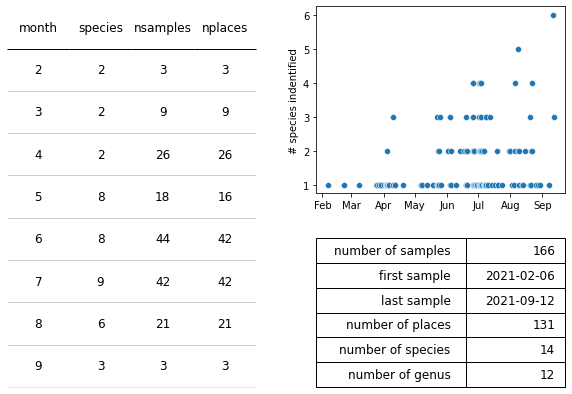

In [14]:
# summarizes invasive species data for year 2

spdinvy2 = spdinv.loc[spdinv["year"] == 2]

t_one = spdinvy2.groupby(["month"], as_index=False).agg({"species":"nunique", "loc_date":"nunique", "locname":"nunique"})

data = t_one.values
colLabels = [*t_one.columns[:-2], "nsamples", "nplaces"]
colWidths = [*[1/len(colLabels)]*len(colLabels)]
print(colWidths)
bbox = [0, 0,1,1]

# axtwo species identified per sample
d = spdinvy2.groupby(["date", "locname"], as_index=False).species.count()

# axthree summary values
summary={
    "number of samples":spdinvy2.loc_date.nunique(),
    "first sample": spdinvy2["date"].min().date(),
    "last sample":spdinvy2["date"].max().date(),
    "number of places":spdinvy2.locname.nunique(),
    "number of species":spdinvy2.species.nunique(),
    "number of genus":spdinvy2.genus.nunique(),    

}

a_summary = pd.DataFrame.from_dict(summary, orient="index").reset_index()


fig = plt.figure(figsize=(10,7))

gs = GridSpec(10,11)

axone = fig.add_subplot(gs[:, 0:5])
axtwo = fig.add_subplot(gs[0:5, 6:])
axthree = fig.add_subplot(gs[6:, 6:])

# axone
table_one = a_simple_formatted_table(axone,data,colLabels=colLabels, colWidths=colWidths, bbox=bbox)
axone.axis("off")

# axtwo
locator = mdates.MonthLocator()  # every month
fmt = mdates.DateFormatter('%b')
sns.scatterplot(data=d, x="date", y="species", ax=axtwo)
axtwo.xaxis.set_major_locator(locator)
axtwo.xaxis.set_major_formatter(fmt)
axtwo.set_ylabel("# species indentified")
axtwo.set_xlabel("")

# axthree
b = a_single_column_table(axthree, a_summary.values, colWidths=[.6, .4])
axthree.axis("off")

plt.show()

## Redlist and priority list species

The IUCN Red List is an internationally comparable ranking of the conservation status of individual species and biotopes. A number of surveys identified 

In [15]:
spd.columns

Index(['Unnamed: 0', 'date', 'species', 'year', 'biogeo', 'canton', 'river',
       'lot', 'forest', 'project', 'city', 'rch', 'rmp', 'rju', 'fam', 'res',
       'pri', 'inv', 'ode', 'ns', 'ongen', 'ni', 'cdf', 'biel', 'locname',
       'loc_date', 'genus', 'month'],
      dtype='object')

In [51]:
# redlist calculations

#only species that appear on the national redlist are not of Least Concern
spdrl = spd2.loc[spd2['rch'] !="X"]
spdrl_nolc = spdrl.loc[spdrl["rch"]!="LC"]
spdrl_nolc_nodd = spdrl_nolc.loc[spdrl_nolc["rch"]!="DD"]
a = spdrl_nolc_nodd.groupby(["rch","locname"]).species.unique()

In [80]:
spdmp2 = spd2.loc[spd2['biogeo'] =="mp"]
spdmprl = spdmp2.loc[spdmp2["rmp"] !="X"]
spdmprl = spdmprl.loc[spdmprl["rmp"] !="LC"]
spdmprl = spdmprl.loc[spdmprl["rmp"] !="DD"]
mytable = spdmprl.groupby(["rmp","locname"]).species.nunique()
mytabletwo = spdmprl.groupby(["rmp","month"]).species.nunique() 
mytabletwodf = mytabletwo.to_frame()

In [83]:
mytabletwodf

species
rmp month         
EN  3            1
    4            2
    6            1
    7            1
NE  2            1
    3            1
    4            2
    5            1
    6            1
    7            3
    8            1
    9            1
NT  2            1
    3            2
    4            2
    5            4
    6           10
    7           11
    8            3
    9            2
VU  4            2
    5            2
    6            3
    8            2
    9            1

In [82]:
mytabletwodf.columns

Index(['species'], dtype='object')

<AxesSubplot:xlabel='month', ylabel='species'>

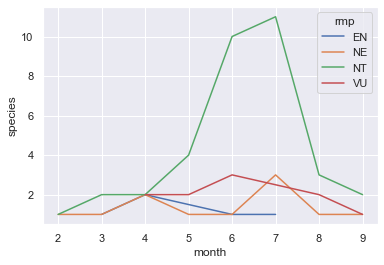

In [84]:
sns.set_theme(style="darkgrid")
datas = spd.copy()
# Load an example dataset with long-form data

# Plot the responses for different events and regions
sns.lineplot(x="month", y="species",hue="rmp",
             data=mytabletwodf)

Thanks to Infoflora's publication in 2019  of regional redlist data, we have the conservation status of most vascular plants at the biogeographical region as well. As noted in the intoruction, 

*__Below left:__ The number of redlist species, and samples and locations that had invasive species per month. __Top right:__ The number of unique invasive species identified per sample. __Bottom right:__ The aggregated values for each year.*

[0.25, 0.25, 0.25, 0.25]


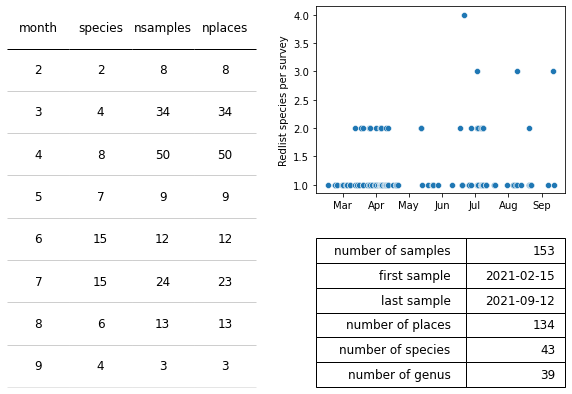

In [53]:
# summarizes redlist species for year 2

t_one = spdmprl.groupby(["month"], as_index=False).agg({"species":"nunique", "loc_date":"nunique", "locname":"nunique"})

data = t_one.values
colLabels = [*t_one.columns[:-2], "nsamples", "nplaces"]
colWidths = [*[1/len(colLabels)]*len(colLabels)]
print(colWidths)
bbox = [0, 0,1,1]

# axtwo species identified per sample
d = spdmprl.groupby(["date", "locname"], as_index=False).species.count()

# axthree summary values
summary={
    "number of samples":spdmprl.loc_date.nunique(),
    "first sample": spdmprl["date"].min().date(),
    "last sample":spdmprl["date"].max().date(),
    "number of places":spdmprl.locname.nunique(),
    "number of species":spdmprl.species.nunique(),
    "number of genus":spdmprl.genus.nunique(),    

}

a_summary = pd.DataFrame.from_dict(summary, orient="index").reset_index()


fig = plt.figure(figsize=(10,7))

gs = GridSpec(10,11)

axone = fig.add_subplot(gs[:, 0:5])
axtwo = fig.add_subplot(gs[0:5, 6:])
axthree = fig.add_subplot(gs[6:, 6:])

# axone
table_one = a_simple_formatted_table(axone,data,colLabels=colLabels, colWidths=colWidths, bbox=bbox)
axone.axis("off")

# axtwo
locator = mdates.MonthLocator()  # every month
fmt = mdates.DateFormatter('%b')
sns.scatterplot(data=d, x="date", y="species", ax=axtwo)
axtwo.xaxis.set_major_locator(locator)
axtwo.xaxis.set_major_formatter(fmt)
axtwo.set_ylabel("Redlist species per survey")
axtwo.set_xlabel("")

# axthree
b = a_single_column_table(axthree, a_summary.values, colWidths=[.6, .4])
axthree.axis("off")

plt.show()

## Madretschkanal and the Suze



In [ ]:
# analysis Madretschkanal and the Suze

## Year three 2022

The surveys will be repeated in year 3. Given the surveyor's additional experience with the subject matter, it is expected to collect significantly more observations and to continue to improve accuracy, efficiency, and geographic coverage. This increased data will also be relatively easier thanks to experience working with the data and having prewritten useful code for its analysis and visualization.

### Objectives
The objective of year three is to build the predictive capacity of the data set to answer the following questions: Given the list of vascular plant species that occur in this area and this set of environmental data, what can I predict about the supported biodiversity ? What areas are most important for target species (bees/butterflies) throughout the year ?

This will require collecting plant occurence data on a wide array of habitats throughout the year and integrating this data into a format compatible for analysis with satellite and GIS data from the municipalaity. In additon 

### Survey period and regularity
Surveys will be conducted from late February through October 2022. This is to capture the early and late blooming flowers that are especially important for hibernating insect species. Ideally each location will be surveyed on a bi-monthly basis to capture the seasonality of the flowering populations, but this will likely not be a possible schedule to maintain for all observation. Thus, a core group of locations will receive this treatment, while other locations will be surveyed opportunistically with the aim of establishing a solid coverage of the municipality of Biel/Bienne.

### Locations
The surveys will again be focused on Biel and the immediate surrounding periurban region. The same locations will be surveyed as in 2021. There are some differences between year 2 and year 3:
* Further locations will be included to more fully capture the Madretschkanal and Suze rivers and broaden the analysis to include other renaturalization and planting efforts.
* Further surveys in La Chaux-de-Fonds, as well as urban regions between Biel and Bern.
* Locations will be standardized to be compatible with (automated) satellite imagery based size estimation and with the GIS system of Biel.
* Locations will be assigned one or more habitat types according to the TypoCH classifaction

### Tools and methodology
The surveys will be conducted using the infoflora app on an android smartphone (Samsung A51). Surveys will again be focused on identification of species and not an estimation of ground cover or dominance. The following differences will be registered:
* The InfoFlora app will be used for all surveys.
* A picture will be saved for as many observations as feasible. 
* The survey location methodology will be modified (see above)
* Plants will be recorded as soon as a reliable observation can be made, without necessarily waiting for the species to flower. This will affect primarily observations of "evergreens" which will be recorded early in the year.

### Additional data
The focus on year three is the compatibility of this data set with the needs of the municipal, cantonal and federal managers of green spaces and biodiversity. As such, a more active approach to the integration of data from Infoflora, the municipality of Biel/Bienna and surrounding communes. In addition, in order to investigate the results of interventions that have taken place over the years, data will be sought out on renaturalization projects to attempt to identify outcomes.



## About the surveyor

New to the field of botany, I used these surveys as a tool to build my own knowledge in regional plant ecology and plant identification. I tested out several imaged based plant identification applications, taught myself how to use a traditional botanical key and used the latest Flora Helvetica guidebook. The number of plants readily identified quickly increased, especially once I became confident in identifying the more common and recognizable species that dominate the landscapes.

## Summary of results

In [ ]:
# overall results